This was the first go at plotting parameters with respect to AR age. Needed functionality has been moved to HARP_and_age.py and versions of these plots are now made in plots_from_saved_params.ipynb

In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt

path_to_dodem = '/Users/jmdunca2/do-dem/'
from sys import path as sys_path
sys_path.append(path_to_dodem+'/dodem/')

import HARP_and_age as haa

In [4]:

agecsv = '/Users/jmdunca2/do-dem/reference_files/Active_Region_Age_Summary.csv'

agedict = haa.parse_age_csv(agecsv, oldway=True)

In [5]:
with open('/Users/jmdunca2/do-dem/reference_files/result_file_dict.pickle', 'rb') as f:
   dictz = pickle.load(f)

In [163]:
f__ = dictz['01-sep-15 region_0']['quiet files all-inst'][0]

with open(f__, 'rb') as f:
    data = pickle.load(f)

print(data.keys())

dict_keys(['time_interval', 'nuenergies', 'nufpm', 'temp_interval', 'plotMK', 'ts', 'ts_', 'mts', 'trmatrix', 'dn_in', 'edn_in', 'chanax', 'nustar_datapath', 'DEM', 'dn_reg', 'edem', 'edn', 'chisq', 'edn_string', 'fill_color', 'mnrat', 'local_maxima', 'max', 'max_temp', 'above_5MK', 'above_7MK', 'above_10MK', 'above_peak', 'below_peak', 'powerlaws', 'EMT_all', 'EMT_thresh_5', 'SPEX_dict', 'powerlaws2'])


In [164]:
def get_ages_vs_params(param='above10'):
    
    ogages = []
    newages = []
    above10s_ = []
    minages = []
    
    for k in agedict.keys():
    
        ages = agedict[k]
    
        if ages[0] and k != '07-may-21 region_0':
    
            files = dictz[k]['quiet files all-inst']
        
            above10s = np.zeros((len(files), 3))
            ind=0
            for f_ in files:
                with open(f_, 'rb') as f:
                    data = pickle.load(f)

                if param=='spexkT':
                    above10s[ind] = data['SPEX_dict']['kT_m_it'][0].value
                if param=='above10':
                    above10s[ind] = np.log10(data['above_10MK'])
                if param=='above7':
                    above10s[ind] = np.log10(data['above_7MK'])
                if param=='above5':
                    above10s[ind] = np.log10(data['above_5MK'])

                if param=='peak':
                    above10s[ind] = 10**data['max_temp']/1e6

                if param=='upperpower':
                    above10s[ind] = list(data['powerlaws'][1])

                if param=='lowerpower':
                    above10s[ind] = list(data['powerlaws'][0])
                    
                if param=='upperpower2':
                    above10s[ind] = list(data['powerlaws2'][1])

                if param=='lowerpower2':
                    above10s[ind] = list(data['powerlaws2'][0])
                
                ind+=1
    
            mns = np.mean(above10s, axis=0)
    
            if np.isfinite(mns[0]):
                above10s_.append(np.mean(above10s, axis=0))
                ogages.append(np.array(ages[0:2]))
                newages.append(np.array(ages[2]))
                if ages[2]:
                    minages.append(ages[2])
                else:
                    minages.append(ages[0])
    
    above10s_ = np.array(above10s_)
    ogages = np.array(ogages)
    
    
    return above10s_, np.array(minages)

In [151]:
list(data['powerlaws'][1])

[-8.857207955307615, 0.18434435122895743, 83.22729179541199]

In [112]:
dataparam, ages = get_ages_vs_params(param='above10')

Text(0.5, 0, 'AR Age (days)')

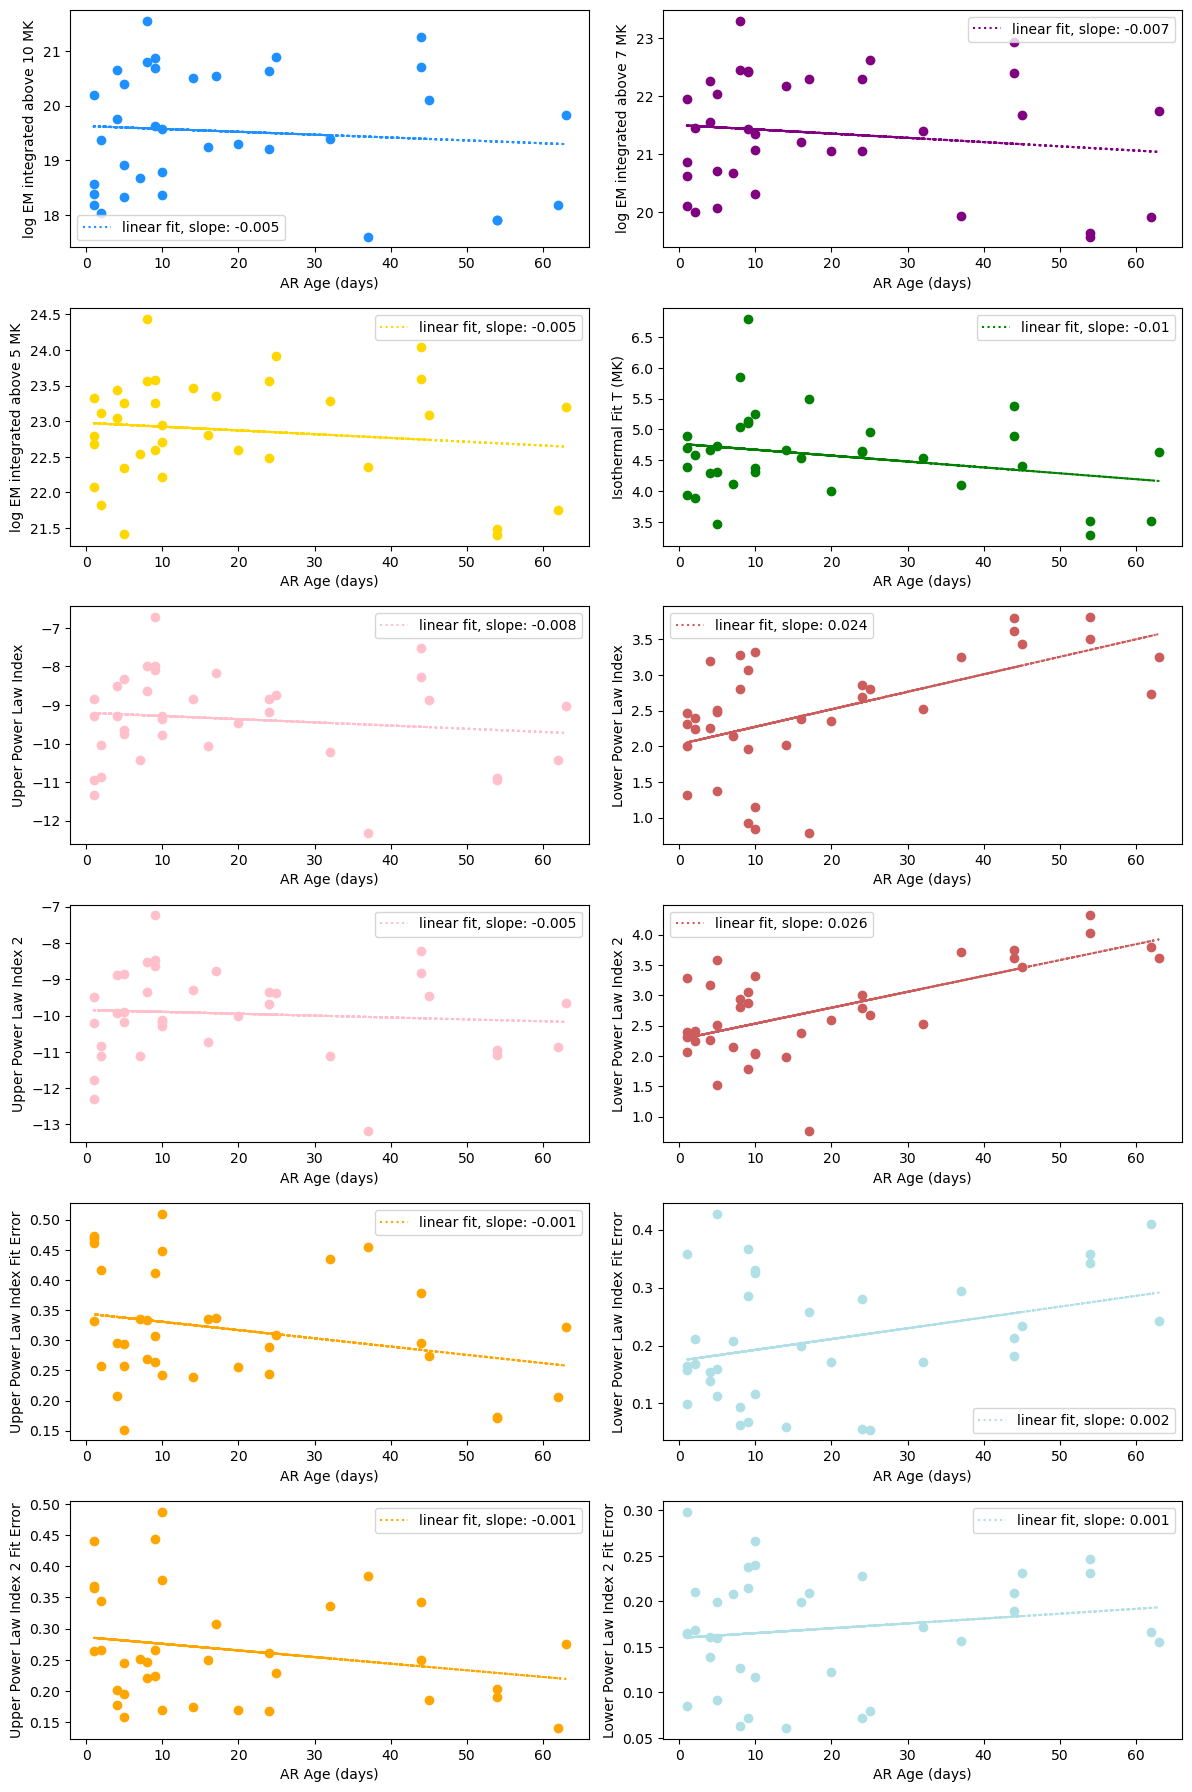

In [167]:

fig, axes = plt.subplots(6,2, figsize=(12, 18), tight_layout = {'pad': 1})

# plt.scatter(ogages[:,1], above10s_[:,0], color='orange')

# m, b = np.polyfit(ogages[:,1], above10s_[:,0], 1)
# fity = np.array(ogages[:,1])*m + b
# plt.plot(ogages[:,1], fity, linestyle='dotted', color='orange', label='linear fit, slope: '+str(round(m,3)))

ax=axes[0,0]

dataparam, ages = get_ages_vs_params(param='above10')
ylabel='log EM integrated above 10 MK'
tcolor='dodgerblue'

ax.scatter(ages, dataparam[:,0], color=tcolor)
m, b = np.polyfit(ages, dataparam[:,0], 1)
fity = np.array(minages)*m + b
ax.plot(minages, fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')

ax=axes[0,1]

dataparam, ages = get_ages_vs_params(param='above7')
ylabel='log EM integrated above 7 MK'
tcolor='purple'

ax.scatter(ages, dataparam[:,0], color=tcolor)
m, b = np.polyfit(ages, dataparam[:,0], 1)
fity = np.array(minages)*m + b
ax.plot(minages, fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')


ax=axes[1,0]


dataparam, ages = get_ages_vs_params(param='above5')
ylabel='log EM integrated above 5 MK'
tcolor='gold'

ax.scatter(ages, dataparam[:,0], color=tcolor)
m, b = np.polyfit(ages, dataparam[:,0], 1)
fity = np.array(minages)*m + b
ax.plot(minages, fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')

ax=axes[1,1]

dataparam, ages = get_ages_vs_params(param='spexkT')
ylabel='Isothermal Fit T (MK)'
tcolor='green'

ax.scatter(ages, dataparam[:,0], color=tcolor)
m, b = np.polyfit(ages, dataparam[:,0], 1)
fity = np.array(minages)*m + b
ax.plot(minages, fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')

ax=axes[2,0]

dataparam, ages = get_ages_vs_params(param='upperpower')
ylabel='Upper Power Law Index'
tcolor='pink'

ax.scatter(ages, dataparam[:,0], color=tcolor)
m, b = np.polyfit(ages, dataparam[:,0], 1)
fity = np.array(minages)*m + b
ax.plot(minages, fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')

ax=axes[2,1]

dataparam, ages = get_ages_vs_params(param='lowerpower')
ylabel='Lower Power Law Index'
tcolor='indianred'

ax.scatter(ages, dataparam[:,0], color=tcolor)
m, b = np.polyfit(ages, dataparam[:,0], 1)
fity = np.array(minages)*m + b
ax.plot(minages, fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')


ax=axes[4,1]

dataparam, ages = get_ages_vs_params(param='lowerpower')
ylabel='Lower Power Law Index Fit Error'
tcolor='powderblue'

ax.scatter(ages, dataparam[:,1], color=tcolor)
m, b = np.polyfit(ages, dataparam[:,1], 1)
fity = np.array(minages)*m + b
ax.plot(minages, fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')



ax=axes[4,0]

dataparam, ages = get_ages_vs_params(param='upperpower')
ylabel='Upper Power Law Index Fit Error'
tcolor='orange'

ax.scatter(ages, dataparam[:,1], color=tcolor)
m, b = np.polyfit(ages, dataparam[:,1], 1)
fity = np.array(minages)*m + b
ax.plot(minages, fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')


ax=axes[3,0]

dataparam, ages = get_ages_vs_params(param='upperpower2')
ylabel='Upper Power Law Index 2'
tcolor='pink'

ax.scatter(ages, dataparam[:,0], color=tcolor)
m, b = np.polyfit(ages, dataparam[:,0], 1)
fity = np.array(minages)*m + b
ax.plot(minages, fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')

ax=axes[3,1]

dataparam, ages = get_ages_vs_params(param='lowerpower2')
ylabel='Lower Power Law Index 2'
tcolor='indianred'

ax.scatter(ages, dataparam[:,0], color=tcolor)
m, b = np.polyfit(ages, dataparam[:,0], 1)
fity = np.array(minages)*m + b
ax.plot(minages, fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')


ax=axes[5,1]

dataparam, ages = get_ages_vs_params(param='lowerpower2')
ylabel='Lower Power Law Index 2 Fit Error'
tcolor='powderblue'

ax.scatter(ages, dataparam[:,1], color=tcolor)
m, b = np.polyfit(ages, dataparam[:,1], 1)
fity = np.array(minages)*m + b
ax.plot(minages, fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')



ax=axes[5,0]

dataparam, ages = get_ages_vs_params(param='upperpower2')
ylabel='Upper Power Law Index 2 Fit Error'
tcolor='orange'

ax.scatter(ages, dataparam[:,1], color=tcolor)
m, b = np.polyfit(ages, dataparam[:,1], 1)
fity = np.array(minages)*m + b
ax.plot(minages, fity, linestyle='dotted', color=tcolor, label='linear fit, slope: '+str(round(m,3)))
ax.legend()
ax.set_ylabel(ylabel)
ax.set_xlabel('AR Age (days)')

In [20]:
m, b = np.polyfit(np.log10(avg_usflxs_arr[:,i]), key_avg_peaks_arr, 1)
        fity = np.array(np.log10(avg_usflxs_arr[:,i]))*m + b
        ax.plot(np.log10(avg_usflxs_arr[:,i]), fity, linestyle='dotted', color='purple', label='linear fit, slope: '+str(round(m,3)))


array([[5.74886506e+19, 1.86173287e+17, 3.08911334e+20],
       [4.87667771e+19, 5.58922941e+16, 2.56894597e+20],
       [1.25981480e+20, 2.35075503e+18, 8.22274413e+20],
       [4.03438135e+19, 4.04678749e+17, 5.50759018e+20],
       [1.09026852e+20, 1.91058914e+17, 5.11905060e+20],
       [2.72805821e+19, 3.58554404e+15, 2.34014726e+20],
       [4.70554202e+19, 2.65053038e+16, 3.69634206e+20],
       [6.65336922e+19, 3.77459621e+17, 3.01483529e+20]])